In [24]:
import os
import glob
import sys

import common as com
import numpy
import tqdm
import sklearn
import torch
from train import list_to_vector_array
from train import file_list_generator
from train import AutoEncoder
from train import fetch_dataloaders
import torch.nn as nn

In [25]:
########################################################################
# visualizer
########################################################################
class Visualizer(object):
    def __init__(self):
        import matplotlib.pyplot as plt
        self.plt = plt
        self.fig = self.plt.figure(figsize=(30, 10))
        self.plt.subplots_adjust(wspace=0.3, hspace=0.3)

    def loss_plot(self, loss):
        """
        Plot loss curve.
        loss : list [ float ]
            training loss time series.
        val_loss : list [ float ]
            validation loss time series.
        return   : None
        """
        ax = self.fig.add_subplot(1, 1, 1)
        ax.cla()
        ax.plot(loss)
        #设置y轴范围
        #self.plt.ylim(-5,100)
        ax.set_title("batch loss")
        ax.set_xlabel("batch")
        ax.set_ylabel("Loss")
        ax.legend(["Train", "Validation"], loc="upper right")

    def save_figure(self, name):
        """
        Save figure.
        name : str
            save png file path.
        return : None
        """
        self.plt.savefig(name)


########################################################################


In [26]:
param = com.yaml_load()
def test(dir,save):
    ab_dir = '../file/noise_detect'
    ab_files = file_list_generator(ab_dir, dir_name=dir)
    com.logger.info('files num {num}'.format(num=len(ab_files)))
    ab_data = list_to_vector_array(ab_files,
                                      msg="generate train_dataset",
                                      n_mels=param["feature"]["n_mels"],
                                      frames=param["feature"]["frames"],
                                      n_fft=param["feature"]["n_fft"],
                                      hop_length=param["feature"]["hop_length"],
                                      power=param["feature"]["power"])
    ab_data = torch.Tensor(ab_data)
    com.logger.info('train_data num {num}'.format(num=len(ab_data)))
    ab_loader = torch.utils.data.DataLoader(dataset=ab_data, batch_size=512, shuffle=True)
    model = torch.load('model/model.pkl')
    loss_func = nn.MSELoss()
    features = []
    losses = []
    for data in ab_loader:
        inumpyuts = data
        feature, y = model(inumpyuts)
        loss = loss_func(y, inumpyuts)
        for one_feature in feature:
            features.append(list(one_feature))
        losses.append(loss)
    #numpy.save('../file/noise_detect/feature/'+save,numpy.array(features))
    return features,losses
feature,feature_loss = test('train','feature')
ab_feature,ab_loss = test('test/new_ab_one','abnormal_feature')
normal_feature,normal_loss = test('test/normal','normal_feature')


2021-10-21 09:57:20,509 - INFO - target_dir : ../file/noise_detect
2021-10-21 09:57:20,512 - INFO - train_file num : 200
2021-10-21 09:57:20,513 - INFO - files num 200
generate train_dataset: 100%|██████████| 200/200 [00:09<00:00, 19.69it/s]
2021-10-21 09:57:30,441 - INFO - train_data num 1400
2021-10-21 09:57:30,673 - INFO - target_dir : ../file/noise_detect
2021-10-21 09:57:30,675 - INFO - train_file num : 4
2021-10-21 09:57:30,676 - INFO - files num 4
generate train_dataset: 100%|██████████| 4/4 [00:00<00:00, 19.59it/s]
2021-10-21 09:57:30,883 - INFO - train_data num 28
2021-10-21 09:57:30,896 - INFO - target_dir : ../file/noise_detect
2021-10-21 09:57:30,897 - INFO - train_file num : 44
2021-10-21 09:57:30,898 - INFO - files num 44
generate train_dataset: 100%|██████████| 44/44 [00:02<00:00, 20.20it/s]
2021-10-21 09:57:33,079 - INFO - train_data num 308


In [27]:
# tt_f,tt_loss = test('tt','feature')

2021-10-21 09:57:33,150 - INFO - target_dir : ../file/noise_detect
2021-10-21 09:57:33,152 - INFO - train_file num : 1
2021-10-21 09:57:33,153 - INFO - files num 1
generate train_dataset: 100%|██████████| 1/1 [00:00<00:00, 18.50it/s]
2021-10-21 09:57:33,221 - INFO - train_data num 7


In [28]:
# visualizer = Visualizer()
# visualizer.loss_plot(ab_loss)
# visualizer.save_figure('ab_loss.png')
# visualizer.loss_plot(normal_loss)
# visualizer.save_figure('normal_loss.png')

C:\ZTTTX\Programing\Anaconda\envs\noise_detect\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [29]:
# import numpy as numpy
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# def plot_embedding(data, label, title):
#     x_min, x_max = numpy.min(data, 0), numpy.max(data, 0)
#     data = (data - x_min) / (x_max - x_min)
#     colors = {0:'r',1:'b'}
#     fig = plt.figure()
#     ax = plt.subplot(111)
#     for i in range(data.shape[0]):
#         plt.text(data[i, 0], data[i, 1], '.',
#                  color=colors[int(label[i])],
#                  fontdict={'weight': 'bold', 'size': 9})
#     plt.xticks([])
#     plt.yticks([])
#     plt.title(title)
#     return fig

# tsne = TSNE(n_components=2, init='pca', random_state=0)




In [30]:
#部分降维
# zero = torch.zeros(len(ab_feature))
# one = torch.ones(len(normal_feature))
# label = torch.cat((zero,one),0)
# feature = ab_feature + normal_feature
# print(len(feature))
# print(len(label))
# result = tsne.fit_transform(feature[:5000])
# fig = plot_embedding(result[:5000], label[:5000],'distribution')
# plt.show(fig)

In [31]:
# result = tsne.fit_transform(feature)

In [32]:
# fig = plot_embedding(result, label,'distribution')
# plt.savefig('distribution_all.png')
# plt.show(fig)

In [33]:
# fig = plot_embedding(result[:5000], label[:5000],'distribution')
# plt.savefig('distribution_all_5000.png')
# plt.show(fig)

In [34]:
def cosine_distance(matrix1,matrix2):
    matrix1_matrix2 = numpy.dot(matrix1, matrix2.transpose())
    matrix1_norm = numpy.sqrt(numpy.multiply(matrix1, matrix1).sum(axis=1))
    matrix1_norm = matrix1_norm[:, numpy.newaxis]
    matrix2_norm = numpy.sqrt(numpy.multiply(matrix2, matrix2).sum(axis=1))
    matrix2_norm = matrix2_norm[:, numpy.newaxis]
    cosine_distance = numpy.divide(matrix1_matrix2, numpy.dot(matrix1_norm, matrix2_norm.transpose()))
    return cosine_distance

In [35]:
feature = numpy.array(feature,dtype='float64')
ab_feature = numpy.array(ab_feature,dtype='float64')
normal_feature = numpy.array(normal_feature,dtype='float64')
ab_distance = cosine_distance(ab_feature,feature)
normal_distance = cosine_distance(normal_feature,feature)


In [36]:
print(feature.shape)
print(normal_feature.shape)
print(ab_feature.shape)

print(ab_distance.shape)
print(normal_distance.shape)

(1400, 32)
(308, 32)
(28, 32)
(28, 1400)
(308, 1400)


In [37]:
cosine_distance(normal_feature[0:2],feature[488:499])

array([[ 0.44317782,  0.29459312,  0.09158826, -0.13596385,  0.28380604,
         0.91464049,  0.08056767,  0.28606324,  0.69717832,  0.09035471,
         0.26422342],
       [ 0.19469783,  0.75608974,  0.43469238, -0.20724066,  0.85533556,
         0.58390407,  0.38582944,  0.75166098,  0.24561302,  0.36303893,
         0.80491971]])

In [38]:
print(ab_distance.argmax(axis=1))
print(normal_distance.argmax(axis=1))

[1370 1104 1271 1088 1315  843  947 1136  479   11 1211    8 1155  947
 1315 1177  240   11  779   11 1263 1088   11  816  151 1123 1370   41]
[ 359   15 1344 1080 1039  372  389 1376  322  728   69 1105 1144 1203
  605   13 1263   18 1272 1242  649  253   15 1195  297  384  878   54
  202  728 1376   15 1105  253  741 1195 1195 1376 1376  557  570 1370
 1195 1376 1303 1391 1395 1105   20 1257 1209   20 1095 1146  404  711
 1111   13 1195   13 1391 1344 1024  504 1376   15 1176 1391  553 1179
 1146  545  220 1263  244 1028  202  203 1195  612  225  965  507 1066
  253 1141 1391  848 1274  102  915  253 1144 1276   15 1211 1292  788
 1265  832   69  244 1198 1030  914  384 1101  718  599 1344 1088 1211
 1005  402  852   54 1256  519   76  757  969  507  895 1350 1350 1168
 1136 1088 1273  757 1198  219 1344  814  658 1144 1080  612  757 1370
  569 1361  569 1263  253 1198 1099 1144 1197 1230  273  711   13  219
  757  796  262  757  649 1141  652  668 1292  885 1391 1266 1391  219
   55

In [39]:
part_feature = numpy.array(feature[:100],dtype='float64')
part_ab_feature = numpy.array(ab_feature[:100],dtype='float64')
part_normal_feature = numpy.array(normal_feature[:100],dtype='float64')
part_ab_distance = cosine_distance(part_ab_feature,numpy.array(part_feature,dtype='float64'))
part_normal_distance = cosine_distance(part_normal_feature,numpy.array(part_feature,dtype='float64'))



In [40]:
numpy.save('../file/noise_detect/cos/ab_data',ab_distance)
numpy.save('../file/noise_detect/cos/normal_data',normal_distance)

In [41]:
print(ab_distance.max(axis=1))
print(normal_distance.max(axis=1))

[0.97327097 0.97990961 0.97834236 0.95460326 0.98811663 0.87681265
 0.97126577 0.90624678 0.90922562 0.98712226 0.96172114 0.98729135
 0.97456601 0.96367927 0.97870143 0.977889   0.84875503 0.98640798
 0.96542398 0.98659557 0.94537788 0.93273824 0.98675621 0.95649165
 0.9887506  0.9441944  0.98031205 0.93925869]
[0.98688997 0.98436373 0.93883392 0.96229372 0.99445022 0.94896453
 0.97101832 0.98034578 0.93581122 0.97338136 0.90831287 0.99078522
 0.97491246 0.89692806 0.83374051 0.98625147 0.99054283 0.97986481
 0.98305101 0.98330569 0.99243789 0.98502087 0.99191171 0.90996736
 0.95854108 0.98907144 0.9816777  0.91783072 0.9059904  0.96582991
 0.98393325 0.98482984 0.99393884 0.98795669 0.98686969 0.89922571
 0.90367845 0.98230418 0.98315021 0.91022862 0.81649571 0.95051475
 0.90374881 0.98971912 0.89075358 0.96750618 0.99090481 0.9882322
 0.98551496 0.98717353 0.91429393 0.98882004 0.98853296 0.98769414
 0.9671131  0.97812642 0.99546374 0.98919268 0.93101808 0.98880896
 0.97509309 0.956

In [42]:
print(ab_distance.max(axis=1).mean())
print(normal_distance.max(axis=1).mean())

0.9582080853878544
0.9606033927091089


In [43]:
print(len(ab_distance[0]))

1400


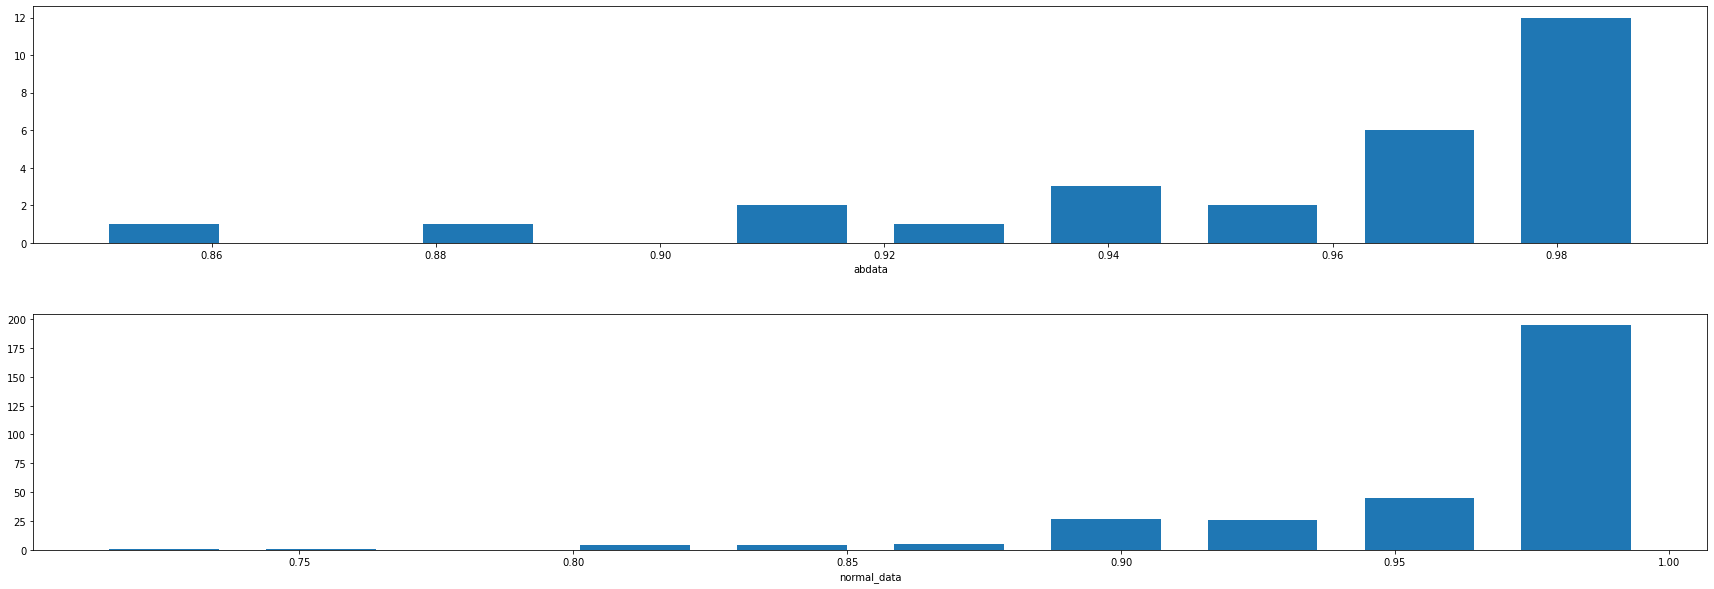

In [44]:
import matplotlib.pylab as plt 
plt.subplot(211)
plt.hist(ab_distance.max(axis=1),rwidth=0.7)
plt.xlabel("abdata")
plt.subplot(212)
plt.hist(normal_distance.max(axis=1),rwidth=0.7)
plt.xlabel("normal_data")
plt.show()

In [45]:
ab_distance[0]

array([ 0.01714719,  0.58868174,  0.9466627 , ...,  0.73995257,
       -0.01258124, -0.10684055])

In [46]:
import librosa
y, sr = librosa.load(r'C:\Users\ztttx\Desktop\workspace\file\noise_detect\train\1-0.wav', sr = None)
print(len(y),'\n')
print(sr)

320000 

32000
